In [119]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

plt.style.use('seaborn-deep')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
from stable_baselines3 import DQN

In [97]:
BASE_PATH = '../../output_models_initial'
BASE_PATH2 = '../../initial_model'
BASE_PATH3 = '../../best_model'

In [139]:
# model = DQN.load(f'{BASE_PATH}/dqn/CnnPolicy/best_model.zip')
# model = DQN.load('../../output_models/dqn/CnnPolicy/2022-06-21_22_10_00_8.zip')

# model = DQN.load(f'{BASE_PATH2}/best_models/dqn_CnnPolicy')
model_policy = '/dqn/CnnPolicy/best_model_'
model = DQN.load(f'{BASE_PATH}{model_policy}4_1000000.zip')
dqn_net = model.q_net

# X = np.load(f'{BASE_PATH2}/dqn/CnnPolicy/observations.npy')
X = np.load(f'{BASE_PATH2}/observations/observations_dqn_CnnPolicy_15.npy')
X = torch.Tensor(X)
X.shape

torch.Size([4820, 1, 1, 15, 7])

In [141]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

In [140]:
# predictions = np.squeeze(np.load(f'{BASE_PATH2}/dqn/CnnPolicy/actions.npy'), axis=1)
predictions = np.squeeze(np.load(f'{BASE_PATH2}/actions/actions_dqn_CnnPolicy.npy'), axis=1)

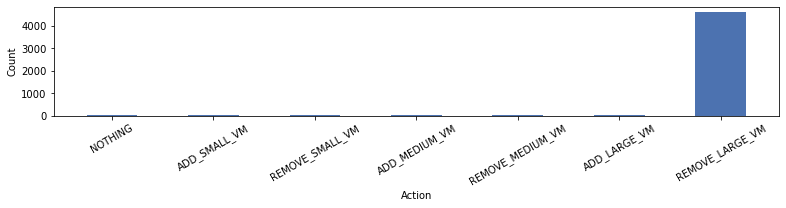

In [142]:
plot_action_histogram(predictions)

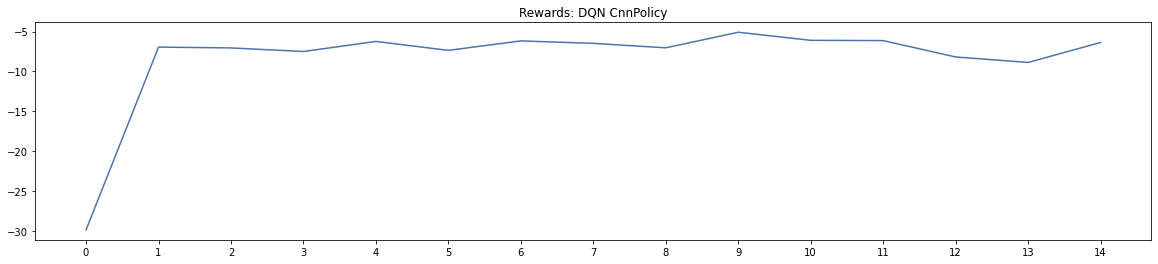

In [14]:
plot_training_data(f'{BASE_PATH2}/dqn/CnnPolicy/training_data.csv', data_type='reward', title='DQN CnnPolicy')

# Attributions

In [143]:
N = 1000
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]
# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='cnn',
                             data=X_sample,
                            predictions=predictions_sample)


torch.Size([1000, 1, 15, 7])


# Mean Attributions

In [144]:

mean_attributions_per_action = ig_attributor.get_mean_attributions()

In [16]:
dqn_net.forward(X[0])

tensor([[ 0.0241,  0.0737, -0.0897,  0.0651, -0.0395,  0.0373,  0.0433]],
       grad_fn=<AddmmBackward0>)

In [25]:
mean_attributions_per_action[0].shape

(1, 15, 7)

In [145]:
action_att = np.zeros(shape=mean_attributions_per_action[0].shape)
for att in mean_attributions_per_action:
    action_att+=att

action_att = action_att / len(mean_attributions_per_action)

In [28]:
action_att.shape

(1, 15, 7)

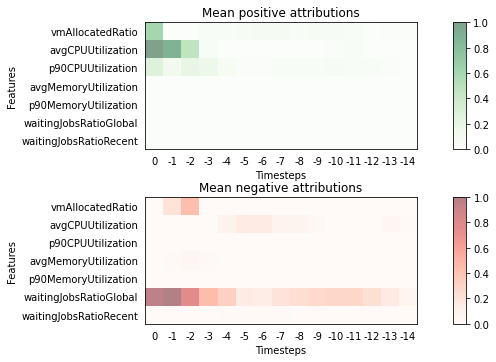

In [146]:
# mean_attributions = np.mean(mean_attributions_per_action, axis=0)

plot_mean_attributions(mean_attributions=action_att, policy='cnn')

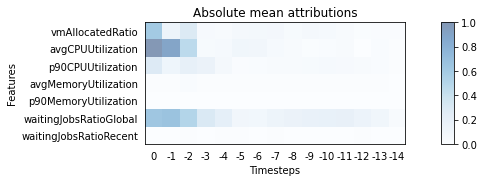

In [147]:
# mean_attributions = np.mean(mean_attributions_per_action, axis=0)

plot_mean_attributions(mean_attributions=action_att, policy='cnn', abs=True)

Mean attributions for action: NOTHING


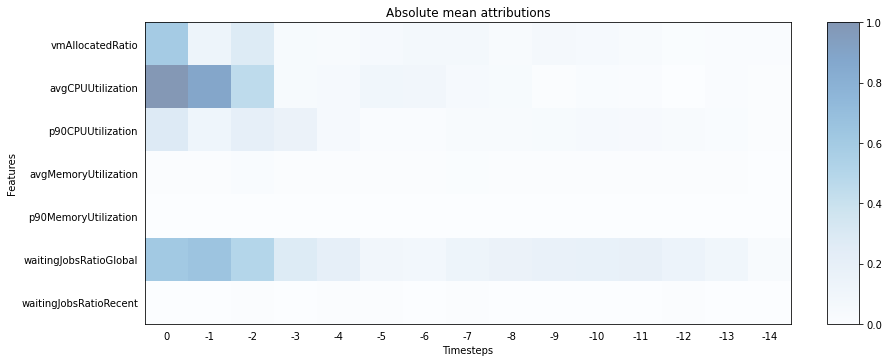

Mean attributions for action: ADD_SMALL_VM


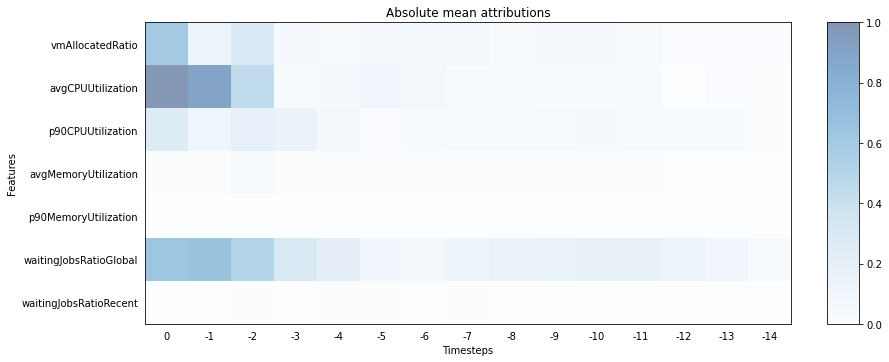

Mean attributions for action: REMOVE_SMALL_VM


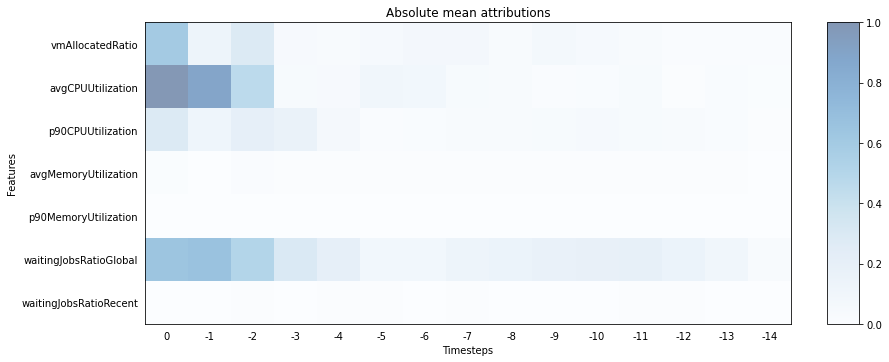

Mean attributions for action: ADD_MEDIUM_VM


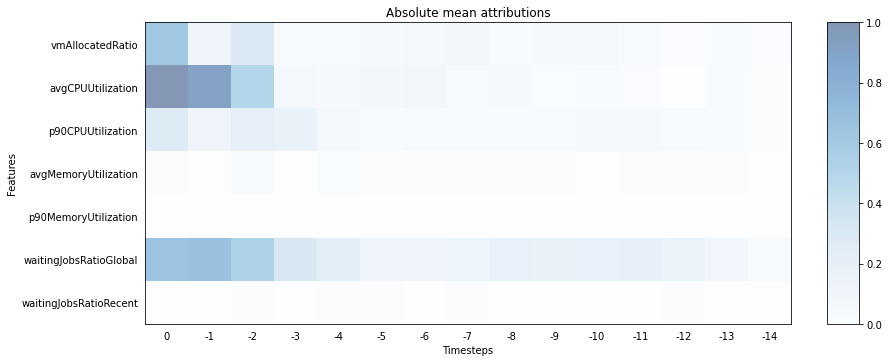

Mean attributions for action: REMOVE_MEDIUM_VM


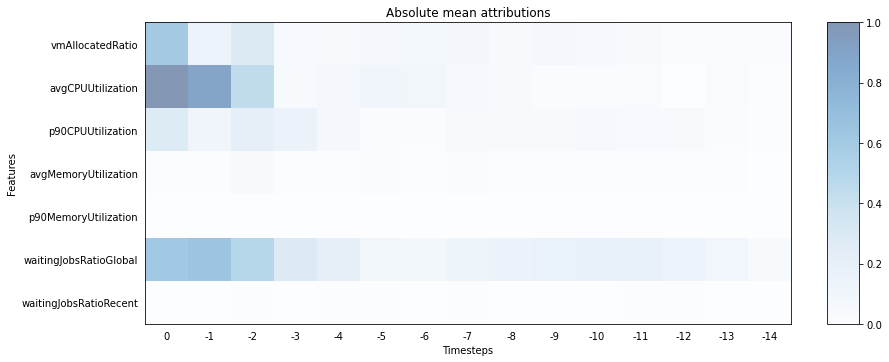

Mean attributions for action: ADD_LARGE_VM


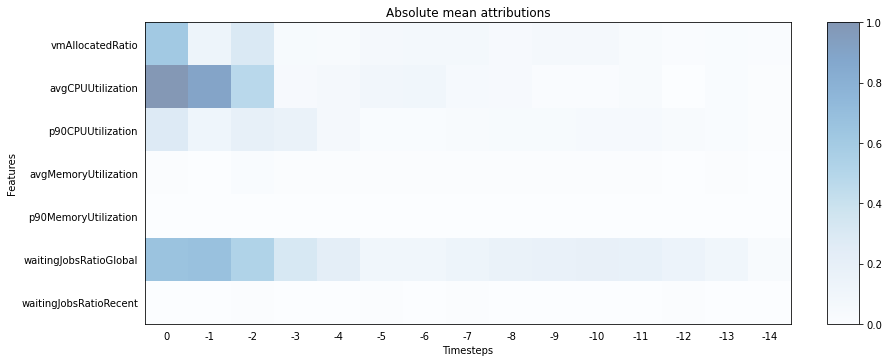

Mean attributions for action: REMOVE_LARGE_VM


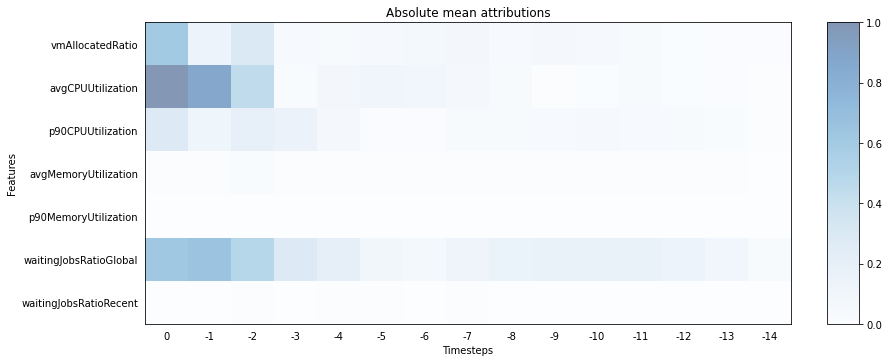

In [149]:
plot_mean_attributions_per_action(mean_attributions=mean_attributions_per_action, policy='cnn', abs=True)

# Attributions for examples

Action made: ADD_SMALL_VM
Q-values:
NOTHING: 0.015363029204308987
ADD_SMALL_VM: 0.07081650197505951
REMOVE_SMALL_VM: -0.08764579892158508
ADD_MEDIUM_VM: 0.0539330393075943
REMOVE_MEDIUM_VM: -0.04185648262500763
ADD_LARGE_VM: 0.03587764501571655
REMOVE_LARGE_VM: 0.04975692927837372



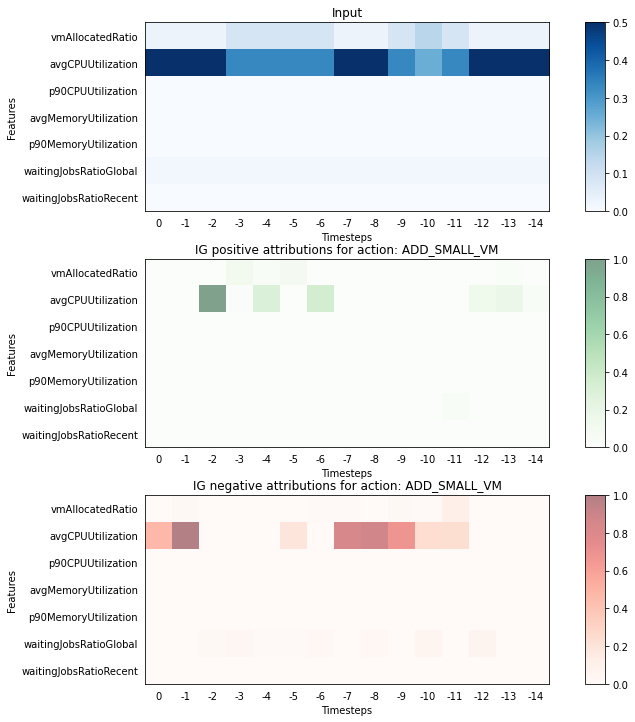

In [89]:
ig_attributor.explain_example(idx=350)

Action made: ADD_SMALL_VM
Q-values:
NOTHING: 0.011547956615686417
ADD_SMALL_VM: 0.08509595692157745
REMOVE_SMALL_VM: -0.0678977370262146
ADD_MEDIUM_VM: 0.06479442864656448
REMOVE_MEDIUM_VM: -0.032601963728666306
ADD_LARGE_VM: 0.057180166244506836
REMOVE_LARGE_VM: 0.045393794775009155

(15, 7, 1)
[[[-2.64535401e-06]
  [-1.18500225e-03]
  [-1.78793897e-03]
  [-2.54735055e-03]
  [ 2.09559480e-03]
  [ 6.58613879e-06]
  [-0.00000000e+00]]

 [[-1.49889513e-05]
  [-1.55617067e-03]
  [-9.20263676e-04]
  [ 6.56824451e-03]
  [-7.75047682e-05]
  [ 1.47406152e-05]
  [ 0.00000000e+00]]

 [[ 2.87272408e-05]
  [ 4.62889040e-03]
  [-4.42196134e-03]
  [-6.97787207e-03]
  [ 1.12306802e-02]
  [-1.10173146e-05]
  [ 0.00000000e+00]]

 [[ 2.60030033e-05]
  [-3.07746275e-03]
  [ 3.24310353e-03]
  [-4.08822402e-03]
  [-3.52364099e-03]
  [-5.73655267e-06]
  [-0.00000000e+00]]

 [[-9.69345890e-06]
  [ 3.12373882e-04]
  [ 3.95165210e-03]
  [-6.18319405e-03]
  [ 3.76497285e-03]
  [ 1.47643832e-05]
  [ 0.00000000e

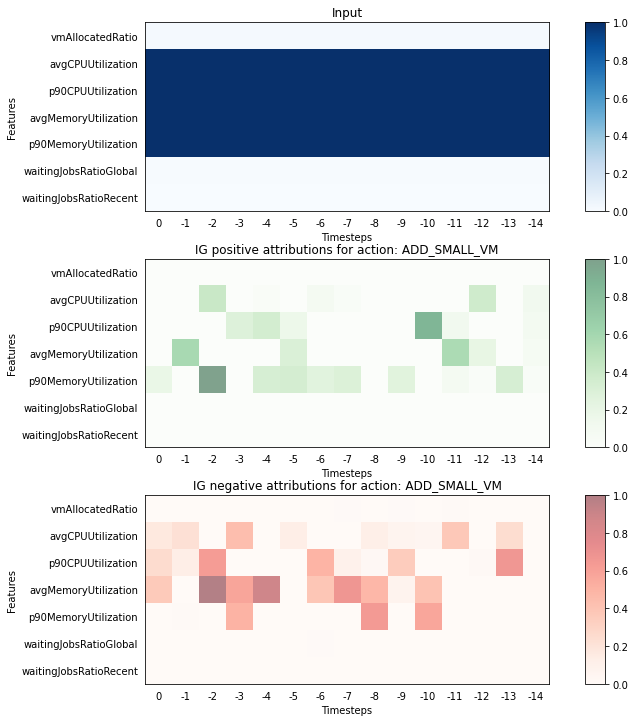

In [86]:
ig_attributor.explain_example(idx=200)

In [ ]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [ ]:
X_manual.shape

In [ ]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='cnn',
                            agent='dqn',
                            data=X_manual,
                            predictions=predictions_manual)

In [ ]:
ig_attributor.explain_example(idx=0)